In [2]:
import pymysql
import pickle

MYSQL_USER_DATA_SAVED_FILE = "mysql/userinfo"

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [3]:
#DB접속
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()
sql = """
    insert into pydb_test(name,price) values(%s, %s)
"""

#위의 쿼리를 기반으로 데이터 입력
cursor.execute(sql,('Xeon Server', 100000))
cursor.execute(sql,('FPGA Server', 20000000))
cursor.execute(sql,('GPU Server', 1000000000))
cursor.execute(sql,('RTS Server', 400000))

db.commit()

db.close()

print('파이썬을 활용한 db입력 성공!')

파이썬을 활용한 db입력 성공!


In [4]:
#DB접속
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()
sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print(row)
    
db.commit()

db.close()

print('파이썬을 활용한 db입력 성공!')

(1, 'Xeon Server', 100000)
(2, 'FPGA Server', 20000000)
(3, 'GPU Server', 1000000000)
(4, 'RTS Server', 400000)
파이썬을 활용한 db입력 성공!


In [7]:
#DB접속
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print('id:',row['id'],',name:',row['name'],',price: ',row['price'])
    
db.commit()

db.close()

print('파이썬을 활용한 db입력 성공!')

id: 1 ,name: Xeon Server ,price:  100000
id: 2 ,name: FPGA Server ,price:  20000000
id: 3 ,name: GPU Server ,price:  1000000000
id: 4 ,name: RTS Server ,price:  400000
파이썬을 활용한 db입력 성공!


In [8]:
#DB접속
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydb_test;
"""

cursor.execute(sql)

db.commit()

db.close()

print('파이썬을 활용한 db 삭제 성공!')

파이썬을 활용한 db 삭제 성공!


In [45]:
#소수점 데이터 처리

db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vender text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)

db.commit()
db.close()

print('float 형태의 테이블 생성 성공!')

float 형태의 테이블 생성 성공!


In [27]:
import time
import math
import calendar
import datetime
import numpy as np

In [11]:
sample_time = np.arange(0,10,0.001)

print(sample_time)
print(len(sample_time))

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
10000


In [12]:
noise = np.random.normal(size = len(sample_time))

print(noise)

[-0.99957841  1.18924822  0.0166845  ...  0.89428595 -1.25594552
 -0.57413228]


In [14]:
voltage = 3 * np.cos(5+sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi/3)) + noise

print(voltage)
print(current)

[-0.14859185  2.04311113  0.8734229  ... -1.37891495 -3.53110297
 -2.85124401]
[ 1.5984978   3.79181274  2.62371389 ... -0.21214556 -2.35400652
 -1.66381289]


In [15]:
!pip install matplotlib

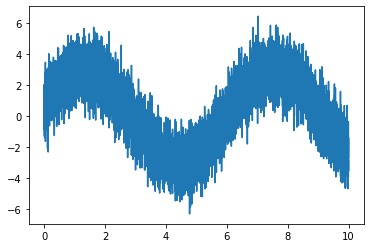

In [21]:
import matplotlib.pyplot as plt

plt.plot(sample_time, voltage)
plt.show()

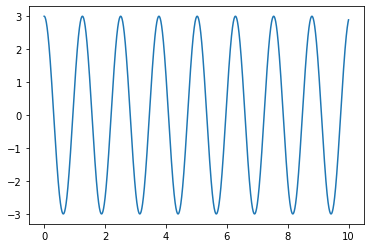

In [22]:
non_noise_voltage = 3 * np.cos(5* sample_time)

plt.plot(sample_time, non_noise_voltage)
plt.show()

In [28]:
ts = calendar.timegm(time.gmtime())

print(ts)

1652774730


In [32]:
print(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2022-05-17 17:05:30


In [37]:
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

print(sample_time)
print(voltage)
print(current)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
[-0.14859185  2.043111    0.8734229  ... -1.378915   -3.531103
 -2.851244  ]
[ 1.5984977   3.7918127   2.623714   ... -0.21214557 -2.3540065
 -1.6638129 ]


In [39]:
ts = (sample_time * 1000) +ts
print(ts)

[1.65277473e+09 1.65277473e+09 1.65277473e+09 ... 1.65278473e+09
 1.65278473e+09 1.65278473e+09]


In [40]:
curr_time = []

for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )

print(curr_time)

['2022-05-17 17:05:30', '2022-05-17 17:05:31', '2022-05-17 17:05:32', '2022-05-17 17:05:33', '2022-05-17 17:05:34', '2022-05-17 17:05:35', '2022-05-17 17:05:36', '2022-05-17 17:05:37', '2022-05-17 17:05:38', '2022-05-17 17:05:39', '2022-05-17 17:05:40', '2022-05-17 17:05:41', '2022-05-17 17:05:42', '2022-05-17 17:05:43', '2022-05-17 17:05:44', '2022-05-17 17:05:45', '2022-05-17 17:05:46', '2022-05-17 17:05:47', '2022-05-17 17:05:48', '2022-05-17 17:05:49', '2022-05-17 17:05:50', '2022-05-17 17:05:51', '2022-05-17 17:05:52', '2022-05-17 17:05:53', '2022-05-17 17:05:54', '2022-05-17 17:05:55', '2022-05-17 17:05:56', '2022-05-17 17:05:57', '2022-05-17 17:05:58', '2022-05-17 17:05:59', '2022-05-17 17:06:00', '2022-05-17 17:06:01', '2022-05-17 17:06:02', '2022-05-17 17:06:03', '2022-05-17 17:06:04', '2022-05-17 17:06:05', '2022-05-17 17:06:06', '2022-05-17 17:06:07', '2022-05-17 17:06:08', '2022-05-17 17:06:09', '2022-05-17 17:06:10', '2022-05-17 17:06:11', '2022-05-17 17:06:12', '2022-05-1

In [46]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into power_data(
        voltage,current, vender, name, reg_date
    ) values (
        %s,%s,%s,%s,%s
    )
"""

try : 
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql, 
               (
                    str(voltage[i]),
                    str(current[i]),
                   'EDDI',
                   'P32N21BTN77PW',
                   curr_time[i]
               )
           )
            db.commit()
finally:
    db.close()

print('float 날짜 데이터 입력 성공!')

float 날짜 데이터 입력 성공!


In [47]:
!python --version

Python 3.9.12


In [49]:
!pip install flask_cors

In [2]:
from flask import Flask, url_for, request, jsonify
from flask_cors import CORS, cross_origin

import json

In [ ]:
app = Flask(__name__)

@app.route('/python-request', methods = ['GET'])
def spring2python():
    print("스프링 요청 성공!")
    data = {"spring2python Success!": True}
    
    return jsonify(data)

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/May/2022 18:07:32] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/May/2022 18:08:16] "GET /python-request HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 18:08:16] "GET /favicon.ico HTTP/1.1" 404 -


스프링 요청 성공!


127.0.0.1 - - [17/May/2022 18:08:16] "GET /images/icons/gear.png HTTP/1.1" 404 -
127.0.0.1 - - [17/May/2022 18:08:29] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/May/2022 18:09:52] "GET /python-request HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 18:09:52] "GET /images/icons/gear.png HTTP/1.1" 404 -


스프링 요청 성공!


127.0.0.1 - - [17/May/2022 18:10:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/May/2022 18:11:18] "GET /python-request HTTP/1.1" 200 -


스프링 요청 성공!
